### Initial Exploratory Data Analysis (EDA)

The first step after data loading is the initial exploratory data analysis (EDA) of the raw data. It consists of identifying variables, assessing the distribution of the data and detecting possible anomalies. This step ensures the quality of the analysis by identifying the nature and structure of the data, while providing effective graphics to visualize the essential characteristics of the data. 
This is a first EDA to the 'candidates' table.

The environment variables are loaded from a `.env` file. The main goal is to manage the configuration, and the `WORK_PATH` environment variable is used to define a working directory.

In [1]:
import sys
import os
from dotenv import load_dotenv

load_dotenv()
work_path = os.getenv('WORK_PATH')

sys.path.append(work_path)

The necessary libraries are imported for use

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sqlalchemy.orm import aliased, sessionmaker
from src.database.connection import config_loader
from src.models.models import Candidates


A connection to a database is established using `connection` and a SQLAlchemy session is created using `sessionmaker` linked to that connection. This streamlines database operations in the program.

In [3]:
connection = config_loader()

Session = sessionmaker(bind=config_loader)
session = Session()


Connected successfully to Workshop-1 database


Using SQLAlchemy, a query is made to the `(Candidates)` table, along with an alias `table`, to read and load the data into a DataFrame.

In [4]:
table = aliased(Candidates)
query = session.query(table).statement
df = pd.read_sql(query, connection)

df.head(5)


,id,first_name,last_name,email,application_date,country,yoe,seniority,technology,code_challenge_score,technical_interview_score
0,1,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3
1,2,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10
2,3,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9
3,4,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,QA Manual,7,1
4,5,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9,7


Count of rows and columns to know how much data there are

In [5]:
num_rows, num_columns = df.shape
print(f'The dataset has {num_rows} rows and {num_columns} columns.')


The dataset has 50000 rows and 11 columns.


Data dictionary to identify the number of null values, data types and unique values. It is evident that there are no null values, two data types and the number of unique values per row.

In [6]:
data_info = {
    'Column Name': list(df.columns),
    'Data Type': list(df.dtypes),
    'Null Values': list(df.isnull().sum()),
    'Unique Values': list(df.nunique())
}

info_table = pd.DataFrame(data_info)
print(info_table)

                  Column Name Data Type  Null Values  Unique Values
0                          id     int64            0          50000
1                  first_name    object            0           3007
2                   last_name    object            0            474
3                       email    object            0          49833
4            application_date    object            0           1646
5                     country    object            0            244
6                         yoe     int64            0             31
7                   seniority    object            0              7
8                  technology    object            0             24
9        code_challenge_score     int64            0             11
10  technical_interview_score     int64            0             11


Graph showing the number of data types and counts. Here you can see that there are 4 columns of integer type and 7 are object type.

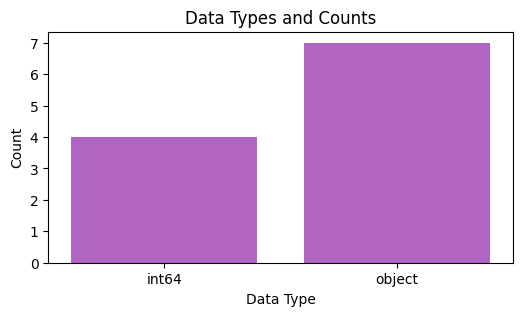

In [7]:
plt.figure(figsize=(6, 3))
sns.countplot(x='Data Type', data=info_table, color='mediumorchid')
plt.title('Data Types and Counts')
plt.xlabel('Data Type')
plt.ylabel('Count')
plt.show()



Generate descriptive statistics. It is evident that on average, candidates have approximately 15.29 years of work experience.

In [8]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
id,50000.0,25000.50000,14433.901067,1.0,12500.75,25000.5,37500.25,50000.0
yoe,50000.0,15.28698,8.830652,0.0,8.00,15.0,23.00,30.0
code_challenge_score,50000.0,4.99640,3.166896,0.0,2.00,5.0,8.00,10.0
technical_interview_score,50000.0,5.00388,3.165082,0.0,2.00,5.0,8.00,10.0


Graph showing the distribution of the "Technology" column and the number of occurrences of each technology. It is observed that there are 24 technologies, where Game Development and DevOps are the ones with more counts.

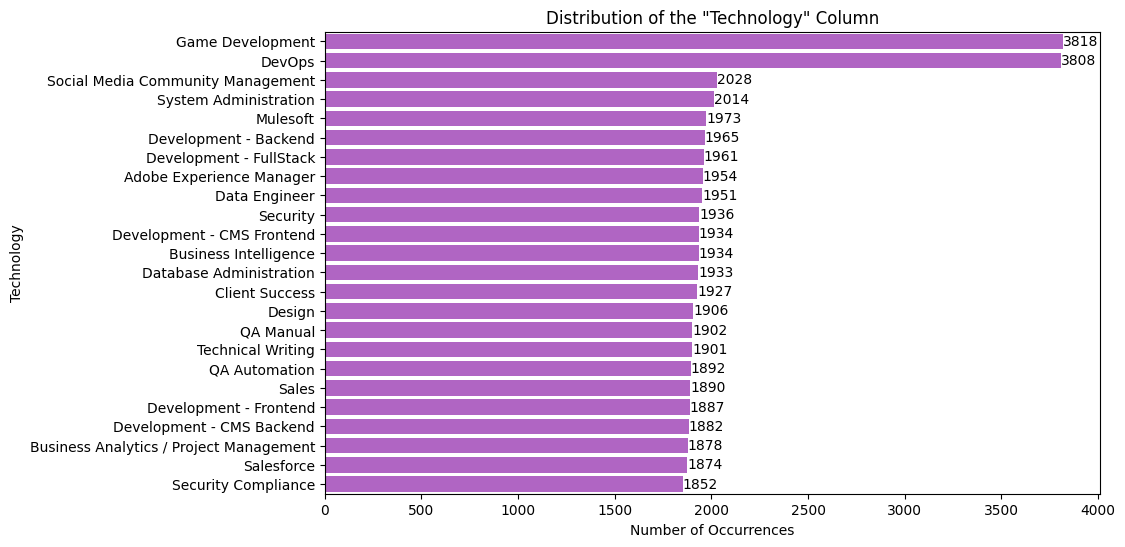

In [9]:
plt.figure(figsize=(10, 6)) 
bars = sns.countplot(y='technology', data=df, order=df['technology'].value_counts().index, color='mediumorchid')
plt.title('Distribution of the "Technology" Column')
plt.xlabel('Number of Occurrences')
plt.ylabel('Technology')

for bar in bars.patches:
    x_val = bar.get_width()
    y_val = bar.get_y() + bar.get_height() / 2
    plt.text(x_val, y_val, f'{int(x_val)}', ha='left', va='center', color='black')

plt.show()


Graph showing the distribution of the "Seniority" column and the number of occurrences of each. As one of the graphs requested in the instructions is in relation to seniority, it is very clear evidence that the 7 categories are very evenly matched as they are around 7000 each.

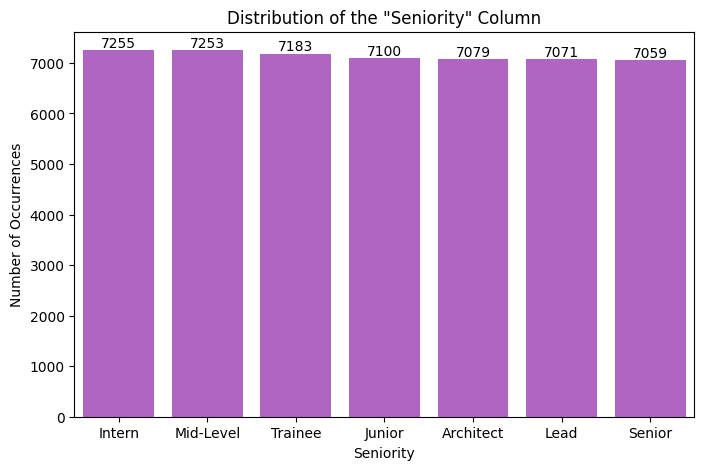

In [10]:
plt.figure(figsize=(8, 5))  
bars = sns.countplot(x='seniority', data=df, order=df['seniority'].value_counts().index, color='mediumorchid')
plt.title('Distribution of the "Seniority" Column')
plt.xlabel('Seniority')
plt.ylabel('Number of Occurrences')

for bar in bars.patches:
    x_val = bar.get_x() + bar.get_width() / 2
    y_val = bar.get_height()
    plt.text(x_val, y_val, f'{int(y_val)}', ha='center', va='bottom', color='black')

plt.show()